# Neizrazito, Evolucijsko i Neuroračunarstvo - 7. zadatak

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import src.utils as utils

from importlib import reload

![](res/img/1.png)

In [3]:
def f1(x, w, s):
    return 1/(1 + np.abs(x-w)/np.abs(s))

w = 2

for s in [1, 0.25, 4]:
    plt.plot(range(-8, 11), [f1(x, w, s) for x in range(-8, 11)], label='s=%.2f'%(s))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

 - Parametar s utječe na izlaz neurona tako što povećanje iznosa parametra izlaz postaje manje strmiji, tj 
do maximuma krivulje se dolazi manje strmijim vrijednostima nego za razliku kada je s manji. Točnije, kontrolira se nagib krivulje i time dobivamo bržu konvergenciju.
 - u slučaju da imamo dva ulaza, prelazimo u jednu dimenziju više, krivulja sada postaje stožasta ploha te se izlaz računa po formuli u kojoj se kvocjenti u nazivniku sumiraju (|x0 - w0|/|s0| + |x1 - w1|/|s1|)

![](res/img/2.png)

In [4]:
X, y = utils.read_data()

utils.plot_2d_clf_problem(X, y)

 - Uzorak su elipsoidne nakupine podataka
 - Razredi nisu međusobno linearno odvojivi

Razmotrite neuronsku mrežu čija je arhitektura 2 × 8 × 3 (skriveni sloj
od neurona tipa 1 , izlazni od neurona tipa 2 ). Riješite sljedeći zadatak.

![treci](res/img/3.png)

![net1](res/img/net1.png)

- Parametri w skrivenog sloja trebali bi odgovarati centrima grupica. Tako svaki neuron 2. sloja odgovara jednoj grupici. Parametri izlaznog sloja trebaju biti oko 1 za grupe koje odgovaraju njegovoj klasi, a oko 0 za sve ostale

![](res/img/4.png)

In [5]:
import src.neural.models as models

net1 = models.NeuralNet(2, 8, 3)

In [6]:
import src.genetic.chromosome as chromosome

population1 = chromosome.generate_new_float_population(30, net1.get_params_size(),
                                                     lambda params: net1.error(X, y, params), -1, 1)

In [7]:
import src.genetic.genetic_algorithm as genetic

gen1 = genetic.EliminationGeneticAlgorithm(population1, max_gen=10000)
params1, error1, errors1 = gen1.run()

In [8]:
print("najmanja pogreška:", error1)
plt.plot(range(len(errors1)), errors1, 'r', label='error 1')
plt.legend()
plt.show()

najmanja pogreška: 0.0730627276395359


In [9]:
h1 = net1.predict(X, params1)

hits1 = 0

for a, b in zip(y, h1):
    if a == b:
        hits1 += 1

print("hits: %d/%d" % (hits1, len(y)))


hits: 64/64


In [10]:
plt.figure(figsize=(15,10))
utils.plot_2d_clf_problem(X, y)

center_x = []
center_y = []

for i in range(0, 32, 4):
    center_x.append(params1[i])
    center_y.append(params1[i + 2])
    
plt.scatter(center_x, center_y)
plt.show()

In [19]:
for i, j in enumerate(range(0, 32, 4)):
    print("s%d,0: %f" % (i,params1[j+1]))
    print("s%d,1: %f" % (i,params1[j+3]))

s0,0: 0.157584
s0,1: -0.218517
s1,0: -0.483141
s1,1: 1.671884
s2,0: -0.106794
s2,1: -0.164726
s3,0: -3.650459
s3,1: 3.954994
s4,0: 0.096569
s4,1: 0.287105
s5,0: -0.113342
s5,1: 0.159830
s6,0: 0.123915
s6,1: -3.909041
s7,0: 0.062556
s7,1: -0.229629


 - Parametri uglavnom ispadaju očekivano, postoji jedan outlier.
 - Parametri s nisu jednaki za x i y komponentu. Općenito, grupe podataka guš;e su raspoređene na x osi, parametar s za x os je manji što znači strmiji.

![net2](res/img/net2.png)

In [22]:
print("Težine skrivenog sloja:")
for i, j in zip(range(0, 32, 4), range(8)):
    print("w0,%d: %f" % (j,params1[i]) )
    print("w1,%d: %f" % (j,params1[i + 2]))

print("\nTežine izlaznog sloja:")
for i in range(3):
    for j in range(9):
        print("w%d,%d: %f" % (j,i, params1[32 + i*9 + j]))
        
    print()

Težine skrivenog sloja:
w0,0: 0.370298
w1,0: 0.229388
w0,1: 0.640747
w1,1: 0.740183
w0,2: 0.120605
w1,2: 0.248588
w0,3: -1.010178
w1,3: 1.966835
w0,4: 0.629315
w1,4: 0.239413
w0,5: 0.875300
w1,5: 0.767925
w0,6: 0.357732
w1,6: 0.779143
w0,7: 0.115140
w1,7: 0.757196

Težine izlaznog sloja:
w0,0: -0.459860
w1,0: 11.005460
w2,0: 8.704014
w3,0: 5.698375
w4,0: -12.192521
w5,0: -13.036812
w6,0: -11.194860
w7,0: -11.393717
w8,0: 14.929363

w0,1: -5.271834
w1,1: -9.312255
w2,1: -3.255916
w3,1: -8.662598
w4,1: 12.890213
w5,1: -2.098471
w6,1: 11.149246
w7,1: -13.860061
w8,1: -3.758792

w0,2: -7.003598
w1,2: 0.048427
w2,2: 15.045773
w3,2: -11.460023
w4,2: 11.151899
w5,2: -1.549059
w6,2: -0.922663
w7,2: -0.964181
w8,2: 1.159449



- Težine izlaznog sloja istrenirale su se tako da je večina težina veliki negativan broj, dok su one koje odgovaraju traženim grupama velik pozitivan broj

![](res/img/5.png)

In [11]:
net2 = models.NeuralNet(2, 8, 4, 3)

population2 = chromosome.generate_new_float_population(30, net2.get_params_size(),
                                                     lambda params: net2.error(X, y, params), -1, 1)

gen2 = genetic.EliminationGeneticAlgorithm(population2, max_gen=10000)
params2, error2, errors2 = gen2.run()

najmanja pogreška: 0.01790303281946003


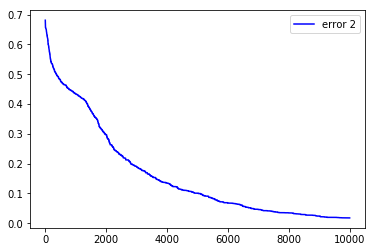

In [12]:
print("najmanja pogreška:", error2)
plt.plot(range(len(errors2)), errors2, 'b', label='error 2')
plt.legend()
plt.show()

In [13]:
h2 = net2.predict(X, params2)

hits2 = 0

for a, b in zip(y, h2):
    if a == b:
        hits2 += 1

print("hits: %d/%d" % (hits2, len(y)))

hits: 64/64


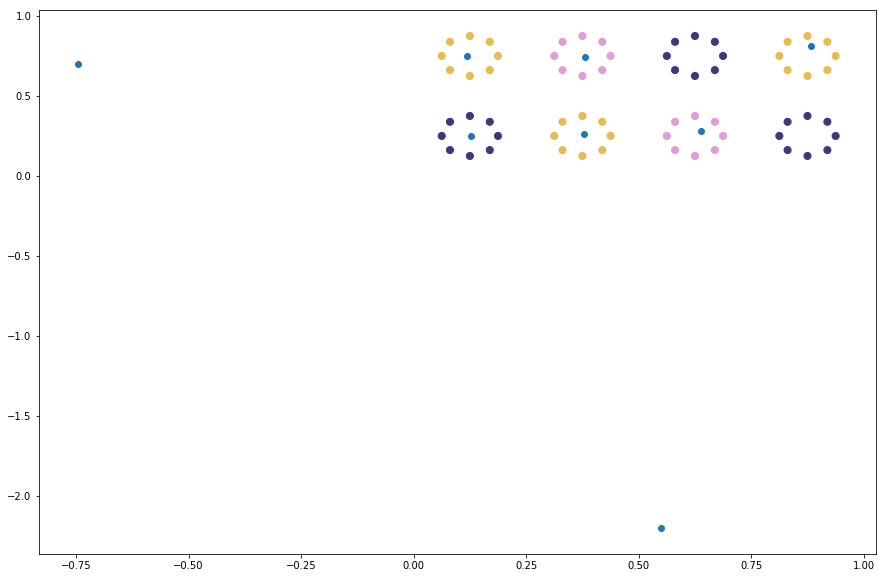

In [24]:
plt.figure(figsize=(15,10))
utils.plot_2d_clf_problem(X, y)

center_x = []
center_y = []

for i in range(0, 32, 4):
    center_x.append(params2[i])
    center_y.append(params2[i + 2])
    
plt.scatter(center_x, center_y)
plt.show()

- Gledajući vrijeme izvođenja programa u odnosu na broj iteracija postupak je trajao dulje, ali se brže dolazi do konvergencije.

![](res/img/6.png)

In [15]:
net3 = models.NeuralNet(2, 6, 4, 3)

population3 = chromosome.generate_new_float_population(30, net3.get_params_size(),
                                                     lambda params: net3.error(X, y, params), -1, 1)

gen3 = genetic.EliminationGeneticAlgorithm(population3, max_gen=10000)
params3, error3, errors3 = gen3.run()

najmanja pogreška: 0.11294276180288695


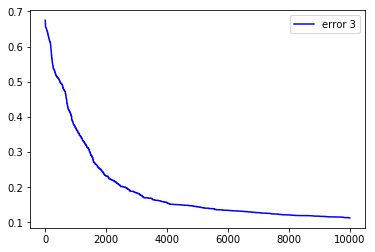

In [16]:
print("najmanja pogreška:", error3)
plt.plot(range(len(errors3)), errors3, 'b', label='error 3')
plt.legend()
plt.show()

In [17]:
h3 = net3.predict(X, params3)

hits3 = 0

for a, b in zip(y, h3):
    if a == b:
        hits3 += 1

print("hits: %d/%d" % (hits3, len(y)))
print()

hits: 63/64



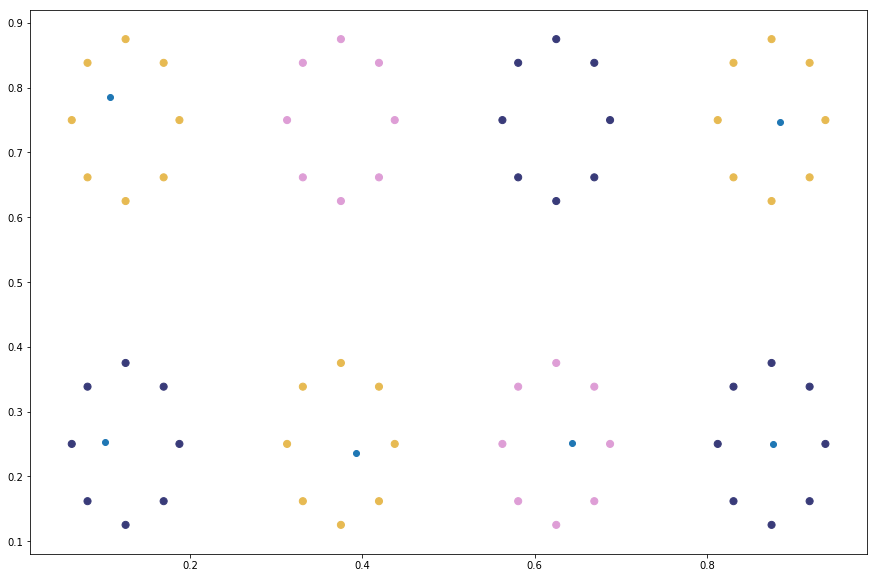

In [25]:
plt.figure(figsize=(15,10))
utils.plot_2d_clf_problem(X, y)

center_x = []
center_y = []

for i in range(0, 24, 4):
    center_x.append(params3[i])
    center_y.append(params3[i + 2])
    
plt.scatter(center_x, center_y)
plt.show()

Izgubili smo kvalitetu generalizacije, veća je šansa za pogrešnom klasifikacijom nego u slučaju s 8 neurona.